In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("train.csv")
data.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [4]:
data.shape

(2016, 8)

Data Preprocessing and EDA 

In [7]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

beds
3     645
2     560
4     398
1     256
5     123
6      22
9       5
7       3
8       2
15      1
14      1
Name: count, dtype: int64
********************
baths
2.0    627
1.0    493
2.5    282
3.0    198
3.5    179
1.5    137
4.0     37
4.5     21
5.0     16
5.5     13
6.0      5
7.0      4
8.5      1
0.5      1
9.0      1
6.5      1
Name: count, dtype: int64
********************
size
2080.0    12
1440.0    11
1460.0    11
1370.0    11
1670.0    11
          ..
1548.0     1
1174.0     1
1865.0     1
578.0      1
795.0      1
Name: count, Length: 879, dtype: int64
********************
size_units
sqft    2016
Name: count, dtype: int64
********************
lot_size
5000.0    61
4000.0    45
6000.0    38
1.0       26
4800.0    16
          ..
745.0      1
5043.0     1
2256.0     1
8540.0     1
4267.0     1
Name: count, Length: 959, dtype: int64
********************
lot_size_units
sqft    1449
acre     220
Name: count, dtype: int64
********************
zip_code
98115    170
98103   

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [8]:
data.isna().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [9]:
data.drop(columns=['lot_size','lot_size_units'],inplace=True)

In [10]:
data.describe()

,beds,baths,size,zip_code,price
count,2016.000000,2016.000000,2016.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,98199.000000,2.500000e+07


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   beds        2016 non-null   int64  
 1   baths       2016 non-null   float64
 2   size        2016 non-null   float64
 3   size_units  2016 non-null   object 
 4   zip_code    2016 non-null   int64  
 5   price       2016 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 94.6+ KB


In [12]:
data['beds'].value_counts()

beds
3     645
2     560
4     398
1     256
5     123
6      22
9       5
7       3
8       2
15      1
14      1
Name: count, dtype: int64

In [13]:
data.head()

,beds,baths,size,size_units,zip_code,price
0,3,2.5,2590.0,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,98106,915000.0
2,4,3.0,2040.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,98102,950000.0


In [14]:
# Price per sq feet

In [15]:
data['price_per_sqft'] = data['price']*100000 / data['size']

In [16]:
data['price_per_sqft']

0       3.069498e+07
1       4.084821e+07
2       4.656863e+07
3       5.131579e+07
4       9.117083e+07
            ...     
2011    6.642336e+07
2012    6.186727e+07
2013    5.373832e+07
2014    7.421384e+07
2015    3.853801e+07
Name: price_per_sqft, Length: 2016, dtype: float64

In [17]:
data.describe()

,beds,baths,size,zip_code,price,price_per_sqft
count,2016.000000,2016.000000,2016.000000,2016.000000,2.016000e+03,2.016000e+03
mean,2.857639,2.159970,1735.740575,98123.638889,9.636252e+05,5.915851e+07
std,1.255092,1.002023,920.132591,22.650819,9.440954e+05,8.327952e+07
min,1.000000,0.500000,250.000000,98101.000000,1.590000e+05,6.796117e+06
25%,2.000000,1.500000,1068.750000,98108.000000,6.017500e+05,4.452221e+07
50%,3.000000,2.000000,1560.000000,98117.000000,8.000000e+05,5.529762e+07
75%,4.000000,2.500000,2222.500000,98126.000000,1.105250e+06,6.595389e+07
max,15.000000,9.000000,11010.000000,98199.000000,2.500000e+07,3.424658e+09


In [18]:
data.shape

(2016, 7)

In [19]:
data

,beds,baths,size,size_units,zip_code,price,price_per_sqft
0,3,2.5,2590.0,sqft,98144,795000.0,3.069498e+07
1,4,2.0,2240.0,sqft,98106,915000.0,4.084821e+07
2,4,3.0,2040.0,sqft,98107,950000.0,4.656863e+07
3,4,3.0,3800.0,sqft,98199,1950000.0,5.131579e+07
4,2,2.0,1042.0,sqft,98102,950000.0,9.117083e+07
...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,98112,910000.0,6.642336e+07
2012,1,1.0,889.0,sqft,98121,550000.0,6.186727e+07
2013,4,2.0,2140.0,sqft,98199,1150000.0,5.373832e+07
2014,2,2.0,795.0,sqft,98103,590000.0,7.421384e+07


In [20]:
data.drop(columns=['size_units'],inplace=True)

In [21]:
data.drop(columns=['price_per_sqft'],inplace=True)

In [22]:
data.head()

,beds,baths,size,zip_code,price
0,3,2.5,2590.0,98144,795000.0
1,4,2.0,2240.0,98106,915000.0
2,4,3.0,2040.0,98107,950000.0
3,4,3.0,3800.0,98199,1950000.0
4,2,2.0,1042.0,98102,950000.0


In [24]:
data.to_csv("final_dataset.csv")

In [36]:
one_hot_encoded = pd.get_dummies(data['beds'], prefix='beds')
data_encoded = pd.concat([data, one_hot_encoded], axis=1)
print(data_encoded)

      beds  baths    size  zip_code      price  beds_1  beds_2  beds_3  \
0        3    2.5  2590.0     98144   795000.0   False   False    True   
1        4    2.0  2240.0     98106   915000.0   False   False   False   
2        4    3.0  2040.0     98107   950000.0   False   False   False   
3        4    3.0  3800.0     98199  1950000.0   False   False   False   
4        2    2.0  1042.0     98102   950000.0   False    True   False   
...    ...    ...     ...       ...        ...     ...     ...     ...   
2011     3    2.0  1370.0     98112   910000.0   False   False    True   
2012     1    1.0   889.0     98121   550000.0    True   False   False   
2013     4    2.0  2140.0     98199  1150000.0   False   False   False   
2014     2    2.0   795.0     98103   590000.0   False    True   False   
2015     3    2.0  1710.0     98133   659000.0   False   False    True   

      beds_4  beds_5  beds_6  beds_7  beds_8  beds_9  beds_14  beds_15  
0      False   False   False   False  

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='price', ylabel='Count'>

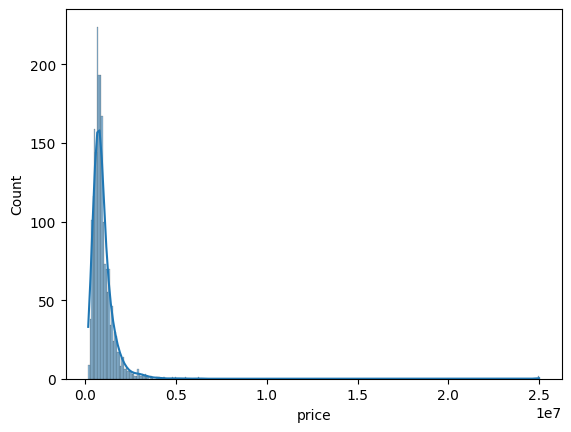

In [39]:
sns.histplot(data['price'], kde=True)

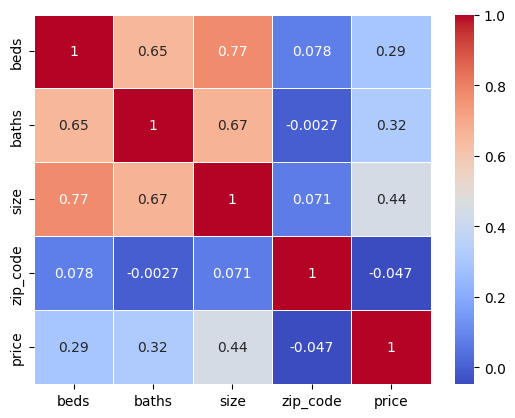

In [40]:
sns.heatmap(data.corr(),annot=True, cmap='coolwarm', linewidth=0.5)
plt.show()

<AxesSubplot: xlabel='beds', ylabel='count'>

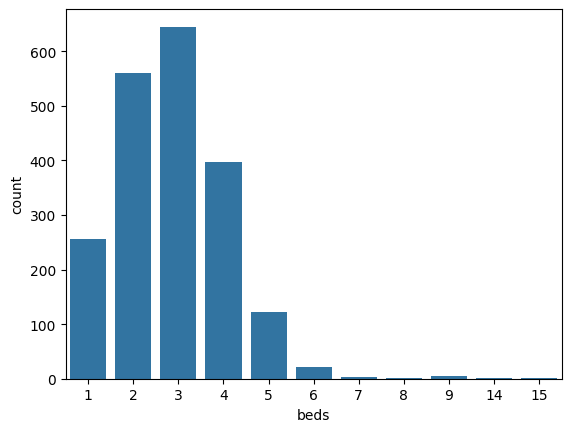

In [42]:
sns.countplot(x='beds', data=data)

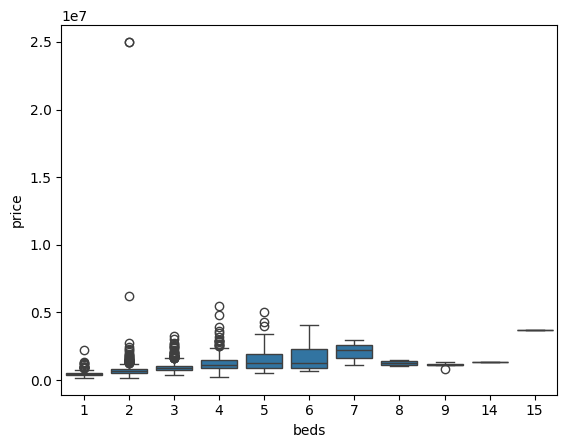

In [43]:
sns.boxplot(x='beds', y='price', data=data)
plt.show()

Modeling

In [89]:
X = data.drop(columns=['price'])
y = data['price']

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [92]:
print(X_train.shape)
print(y_train.shape)

(1612, 4)
(1612,)


Applying Linear Regression

In [94]:
column_trans = make_column_transformer((OneHotEncoder(), ['beds']), remainder='passthrough')

In [95]:
scaler = StandardScaler()

In [96]:
lr = LinearRegression(normalize=True)

TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'

In [97]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# X being feature matrix
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

lr = LinearRegression()
lr.fit(X_scaled, y)

LinearRegression()

In [106]:
pipe = make_pipeline(column_trans,scaler, lr)

In [107]:
pipe.fit(X_train,y_train,)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['beds'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [108]:
y_pred_lr = pipe.predict(X_test)

In [109]:
r2_score(y_test,y_pred_lr)

0.5746822864697891

using Lasso

In [110]:
lasso = Lasso()

In [111]:
pipe = make_pipeline(column_trans,scaler, lasso)

In [112]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['beds'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('lasso', Lasso())])

In [113]:
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.5746817917321105

using Ridge

In [114]:
ridge = Ridge()

In [115]:
pipe = make_pipeline(column_trans,scaler, ridge)

In [116]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['beds'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('ridge', Ridge())])

In [117]:
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.5746891139050041

In [118]:
print("No Regularization: ", r2_score(y_test,y_pred_lr))
print("Lasso: ", r2_score(y_test,y_pred_lasso))
print("Ridge: ", r2_score(y_test,y_pred_ridge))

No Regularization:  0.5746822864697891
Lasso:  0.5746817917321105
Ridge:  0.5746891139050041


In [119]:
import pickle

In [120]:
pickle.dump(pipe, open('RidgeModel.pkl','wb'))